### Tipología y Ciclo de Vida de los Datos
#### Práctica 2 - Limpieza y análisis de datos
#### UOC - Universitat Oberta de Catalunya

In [12]:
# Leer lo archivo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
train = pd.read_csv('train.csv')

In [18]:
train.shape

(891, 12)

In [13]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [25]:
# Miramos se hay valores nulos y en cual cantidad
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [34]:
sex = pd.crosstab(index=train["Sex"],
                              columns="count")
sex/sex.sum()

col_0,count
Sex,
female,0.352413
male,0.647587


In [35]:
Pclass = pd.crosstab(index=train["Pclass"],
                               columns="count")
Pclass/Pclass.sum()

col_0,count
Pclass,
1,0.242424
2,0.206510
3,0.551066


In [42]:
Survived = pd.crosstab(index=train["Survived"],
                              columns="count")
Survived/Survived.sum()

col_0,count
Survived,
0,0.616162
1,0.383838


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E016077438>]],
      dtype=object)

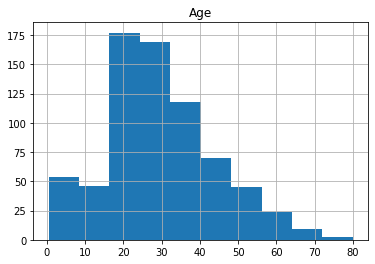

In [38]:
train.hist(column='Age')

In [46]:
def f(x):
  if x['Age'] >= 45: return '>= 45 anõs'
  elif x['Age'] < 45  and x['Age'] >= 35: return '>= 35 y <45 años'
  elif x['Age'] < 35 and x['Age'] >= 25: return '>= 25 y < 35 años'
  elif x['Age'] < 25  and x['Age'] >= 18: return '>= 18 y < 25 años'
  elif x['Age'] < 18: return '< 18 años'
  else: return 'Sin inforamción'

train['Age_2'] = train.apply(f, axis=1)

In [50]:
Age_2 = pd.crosstab(index=train["Age_2"],
                              columns="count")
Age_2/Age_2.sum()

col_0,count
Age_2,
< 18 años,0.126824
>= 18 y < 25 años,0.185185
>= 25 y < 35 años,0.225589
>= 35 y <45 años,0.134680
>= 45 anõs,0.129068
Sin inforamción,0.198653


In [43]:
SibSp = pd.crosstab(index=train["SibSp"],
                              columns="count")
SibSp/SibSp.sum()

col_0,count
SibSp,
0,0.682379
1,0.234568
2,0.031425
3,0.017957
4,0.020202
5,0.005612
8,0.007856


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E0160775F8>]],
      dtype=object)

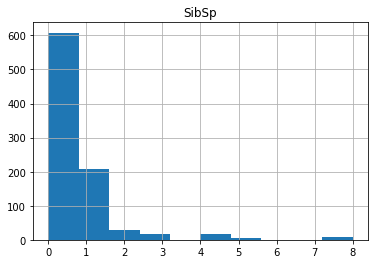

In [39]:
train.hist(column='SibSp')

In [54]:
def g(x):
  if x['SibSp'] > 0: return 'Con hermanos o cónyuge'
  else: return 'Sin hermanos o cónyuge'

train['SibSp_2'] = train.apply(g, axis=1)

In [55]:
SibSp_2 = pd.crosstab(index=train["SibSp_2"],
                              columns="count")
SibSp_2/SibSp_2.sum()

col_0,count
SibSp_2,
Con hermanos o cónyuge,0.317621
Sin hermanos o cónyuge,0.682379


In [44]:
Parch = pd.crosstab(index=train["Parch"],
                              columns="count")
Parch/Parch.sum()

col_0,count
Parch,
0,0.760943
1,0.132435
2,0.089787
3,0.005612
4,0.004489
5,0.005612
6,0.001122


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E016077DA0>]],
      dtype=object)

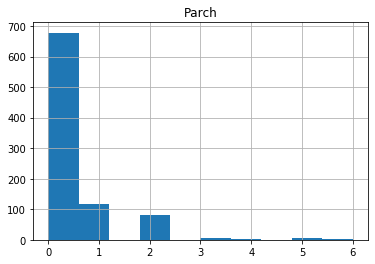

In [40]:
train.hist(column='Parch')

In [56]:
def h(x):
  if x['Parch'] > 0: return 'Con hijos a bordo'
  else: return 'Sin hijos a bordo'

train['Parch_2'] = train.apply(h, axis=1)

In [57]:
Parch_2 = pd.crosstab(index=train["Parch_2"],
                              columns="count")
Parch_2/Parch_2.sum()

col_0,count
Parch_2,
Con hijos a bordo,0.239057
Sin hijos a bordo,0.760943


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E015B97B38>]],
      dtype=object)

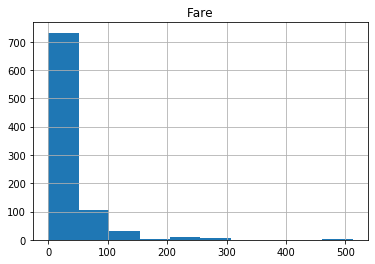

In [62]:
train.hist(column='Fare')

In [58]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [61]:
train.groupby('Pclass')['Fare'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,84.154687,78.380373,0.0,30.92395,60.2875,93.5,512.3292
2,184.0,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
3,491.0,13.675550,11.778142,0.0,7.75000,8.0500,15.5,69.5500
